# This notebook is intended to give visual representationa and analysis of COVID19 situtaion in India.

We are analysing statewise cases in this notebook. We will first see the ongoing scenario in current week and then we will compare the overall performance of current week with the avg of total. This will give us an idea about whether we are proceesing in right direction or not. 

In [2]:
import json
import requests
from matplotlib import pyplot
import datetime
import numpy

## Gathering all the required data from api

First we will gather required data from api and then we will format that data in such way that we can easily play with it.

In [82]:
# Getting json data from the api

stateData = requests.get("https://api.covid19india.org/v4/timeseries.json").content
with open('state.json', 'wb') as fw:
    fw.write(stateData)
print(f"Data available for following states:\n {tuple(json.loads(stateData).keys())}")

Data available for following states:
 ('AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DL', 'DN', 'GA', 'GJ', 'HP', 'HR', 'JH', 'JK', 'KA', 'KL', 'LA', 'MH', 'ML', 'MN', 'MP', 'MZ', 'NL', 'OR', 'PB', 'PY', 'RJ', 'SK', 'TG', 'TN', 'TR', 'TT', 'UN', 'UP', 'UT', 'WB')


Filter the data statewise and then store them in different variables. We will use these variables in representaion section.  
Available fields in retrieved data are :  
for last date - "confirmed", "deceased", "recovered", "tested"  
for total - "confirmed", "deceased", "migrated", "recovered", "tested"  
*But fields are only there when they correspond to some data*

In [83]:
# Filtering data for a state
bihar_data = json.loads(stateData)['BR']

dates = tuple(bihar_data['dates'].keys())
last_date = dates[-1]
# if todays data are not updated then use last available data
if 'delta' not in bihar_data['dates'][last_date].keys():   
    last_date = dates[-2]

last_update = bihar_data['dates'][last_date]['delta']
total_summary = bihar_data['dates'][dates[-1]]['total']


# labels and colors to be used on plots
labels = ('tested', 'confirmed', 'deceased', 'recovered')
colors = ('blue', 'orange', 'red', 'green')


# Getting data of last one week:
last_week = dates[-7]
if last_week[-1] != last_date:
    last_week = dates[-8:-1]
last_week_data = tuple(bihar_data['dates'][x]['delta'] for x in last_week)                          # day wise 
last_week_update = {label: list(map(lambda x: x[label] , last_week_data))for label in labels}   # lable wise
# or we can use
# last_week_update = {label :[x[label] for x in last_week_data] for label in labels }
last_week_mmdd = tuple(x[-5:] for x in last_week)      # dates in mm-dd format

# Variable data which will be ploted
variables = tuple(x for x in last_week_update.values())

## Now its time to plot the data for visual analysis
First we will plot data for last week. We are plotting here on linear plot and bar chart to analyse No. of tests, confirmed cases, deceased and recovered.

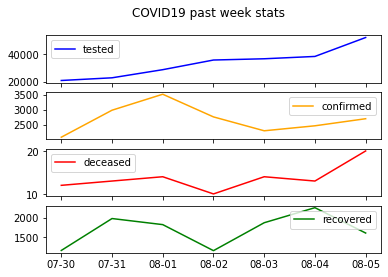

In [84]:
fig, axs = pyplot.subplots(4, sharex = True)
fig.suptitle('COVID19 past week stats')
for i in range(len(labels)):
    axs[i].plot(last_week_mmdd, variables[i], label=labels[i], color=colors[i])
    axs[i].legend(loc='best')
pyplot.show()   

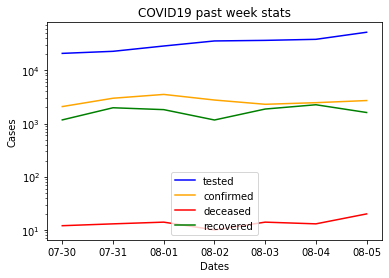

In [85]:
# All data on a single plot
fig, ax = pyplot.subplots()

for i in range(len(labels)):
    ax.plot(last_week_mmdd, variables[i], label=labels[i], color=colors[i])
    ax.legend(loc='best')
    
ax.set_xlabel("Dates")
ax.set_ylabel("Cases")
ax.set_yscale('log')        # log scaling for better analysis on single plot
ax.set_title("COVID19 past week stats")
pyplot.show()

<Figure size 720x1440 with 0 Axes>

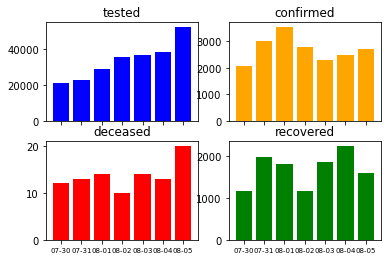

In [86]:
# Bar chart
pyplot.figure(figsize=(10,20))
fig, axs = pyplot.subplots(2,2, sharex=True)
for (i,j), _ in numpy.ndenumerate(axs):
    bar = axs[i][j].bar(last_week_mmdd, variables[i*2+j], color=colors[i*2+j])
    axs[i][j].set_title(labels[i*2+j])
    axs[i][j].tick_params(axis='x', which='major', labelsize=7)
    
pyplot.show()

### comparision between last week data and total till now
Now we will compare the performance of this week with total cases till now.

In [87]:
total_lw = tuple(sum(label) for label in variables)
total_now = tuple(total_summary[label] for label in labels)
total_lw, total_now

((234449, 18813, 96, 11866), (739078, 64732, 369, 42370))

<Figure size 720x1080 with 0 Axes>

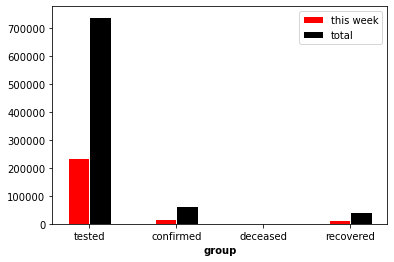

In [88]:
# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
ind1 = numpy.arange(len(bars1))
ind2 = [x + barWidth for x in r1]
 
# Make the plot
pyplot.figure(figsize=(10,15))
fig, ax = pyplot.subplots()
ax.bar(r1, total_lw, color='red', width=barWidth, edgecolor='white', label='this week')
ax.bar(r2, total_now, color='black', width=barWidth, edgecolor='white', label='total')
 
# Add xticks on the middle of the group bars
ax.set_xlabel('group', fontweight='bold')
pyplot.xticks(ind1 + barWidth / 2, labels)
 
# Create legend & Show graphic
ax.legend(loc='best')
pyplot.show()


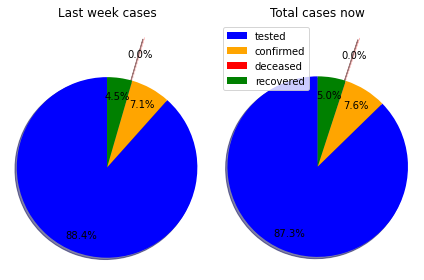

In [89]:
# Pie chart
# Set which pie to pop out and how much
explode = (0, 0, 0.5, 0)
fig, axs = pyplot.subplots(1,2)
axs[0].pie(total_lw, explode=explode, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.8, labeldistance=1.1)
axs[0].axis('equal')
axs[0].set_title("Last week cases")
axs[1].pie(total_now, explode=explode, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance=0.8, labeldistance=1.1)
axs[1].axis('equal')
axs[1].set_title("Total cases now")

pyplot.tight_layout()
pyplot.legend(labels=labels, loc='best')
pyplot.show()

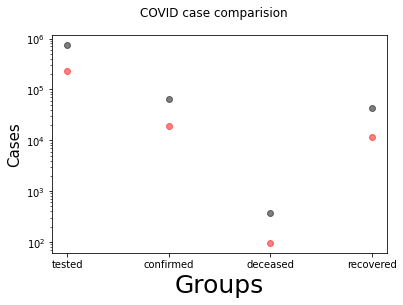

In [90]:
# Scatter plot
fig, ax = pyplot.subplots()
ax.scatter(labels, total_lw, alpha=0.5, color='red')
ax.scatter(labels, total_now, alpha=0.5, color='black')
ax.set_yscale('log')
ax.set_xlabel(r'Groups', fontsize=25)
ax.set_ylabel(r'Cases', fontsize=15)
fig.suptitle('COVID case comparision')
pyplot.show()